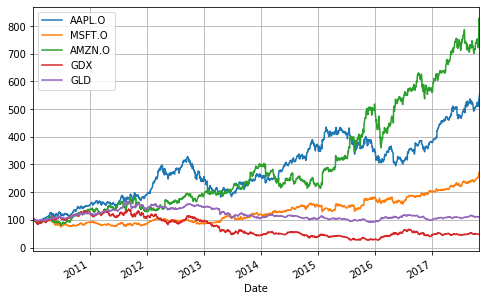

In [1]:
%matplotlib inline
import pandas as pd
tickers = ['AAPL.O', 'MSFT.O', 'AMZN.O', 'GDX', 'GLD']
num_assets = len(tickers)
data = pd.read_csv('data/tr_eikon_eod_data.csv',
                   index_col=0, parse_dates=True)[tickers]
(data / data.iloc[0,:] * 100).plot(figsize=(8, 5), grid=True)

$$\begin{array}{lllll}
\mbox{Return}&&\displaystyle
{\bf r}
=
\left[\begin{array}{c}
r^{(1)}_t\\\vdots\\r^{(n)}_t
\end{array}\right]
=
\left[\begin{array}{c}
\frac{S^{(1)}_t-S^{(1)}_{t-1}}{S^{(1)}_{t-1}}\\\vdots\\\frac{S^{(n)}_t-S^{(n)}_{t-1}}{S^{(n)}_{t-1}}
\end{array}\right]
\approx
\left[\begin{array}{c}
\log\frac{S^{(1)}_t}{S^{(1)}_{t-1}}\\\vdots\\\log\frac{S^{(n)}_t}{S^{(n)}_{t-1}}
\end{array}\right]
\nonumber\\
\\
\mbox{Expected return}&&\displaystyle
\mu
=
252*E{\bf r}_t
=
\left[\begin{array}{c}
\mu_1\\\vdots\\\mu_n
\end{array}\right]\nonumber\\
\\
\mbox{Covariance}&&\displaystyle
\Sigma
=
252*E({\bf r}_t-E{\bf r}_t)({\bf r}_t-E{\bf r}_t)^T
=
\left[\begin{array}{cccc}
\sigma_1^2&\sigma_{12}&\cdots&\sigma_{1n}\\
\sigma_{21}&\sigma_{2}^2&\cdots&\sigma_{2n}\\
\vdots&\vdots&\ddots&\vdots\\
\sigma_{n1}&\sigma_{n2}&\cdots&\sigma_{n}^2
\end{array}\right]\nonumber
\end{array}$$

In [2]:
import numpy as np
r = np.log(data / data.shift(1))
mu = 252*r.mean()
sigma = 252*r.cov()

In [3]:
print(mu)

AAPL.O    0.218633
MSFT.O    0.126401
AMZN.O    0.269869
GDX      -0.096212
GLD       0.012069
dtype: float64


In [4]:
print(sigma)

          AAPL.O    MSFT.O    AMZN.O       GDX       GLD
AAPL.O  0.064899  0.022504  0.026932  0.014669  0.001510
MSFT.O  0.022504  0.050234  0.029146  0.010995 -0.000426
AMZN.O  0.026932  0.029146  0.097792  0.009917 -0.001584
GDX     0.014669  0.010995  0.009917  0.150716  0.048760
GLD     0.001510 -0.000426 -0.001584  0.048760  0.027666


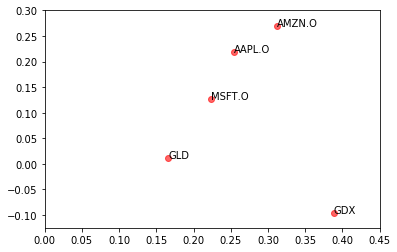

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for ticker in tickers:
    ax.scatter(np.sqrt(sigma.loc[ticker, ticker]), mu[ticker], alpha=0.6, c='r')
    ax.annotate(ticker, (np.sqrt(sigma.loc[ticker, ticker]), mu[ticker]))
ax.set_xlim([0.,0.45])
ax.set_ylim([-0.125,0.3])
plt.show()

In [6]:
from copy import copy
tickers_original = copy(tickers)
mu_original = copy(mu)
sigma_original = copy(sigma)

# random portfolios (no short positions)

$$\begin{array}{llll}
\mbox{Portfolio}&&\displaystyle
{\bf w}
=
\left[\begin{array}{c}
w_1\\\vdots\\w_n
\end{array}\right]
\quad\mbox{with}\quad
{\bf 1}^T{\bf w}=1\nonumber\\
\\
\mbox{Return}&&\displaystyle
r_{\bf w}
=
{\bf r}^T{\bf w}\nonumber\\
\\
\mbox{Expected return}&&\displaystyle
\mu_{\bf w}
=
\mu^T{\bf w}\nonumber\\
\\
\mbox{Variance}&&\displaystyle
\sigma_{\bf w}^2
=
{\bf w}^T\Sigma{\bf w}\nonumber
\end{array}$$

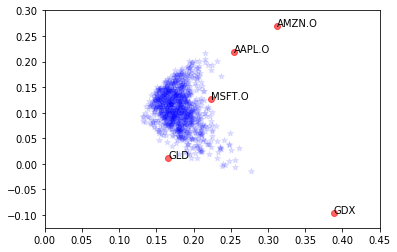

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
mu_random_no_short = []
sigma_random_no_short = []
fig, ax = plt.subplots()
for _ in range(1000):
    w = np.random.uniform(size=(num_assets, 1))
    w /= np.sum(w)
    mu_temp = np.sum(mu_original*w.reshape((-1,)))
    sigma_temp = (w.T@sigma_original@w).iloc[0,0]
    ax.scatter(np.sqrt(sigma_temp), mu_temp, alpha=0.1, marker='*', c='b') 
    mu_random_no_short.append(mu_temp)
    sigma_random_no_short.append(sigma_temp)
mu_random_no_short = np.array(mu_random_no_short)
sigma_random_no_short = np.array(sigma_random_no_short)
for ticker in tickers:
    ax.scatter(np.sqrt(sigma.loc[ticker, ticker]), mu[ticker], alpha=0.6, c='r')
    ax.annotate(ticker, (np.sqrt(sigma.loc[ticker, ticker]), mu[ticker]))
ax.set_xlim([0.,0.45])
ax.set_ylim([-0.125,0.3])
plt.show()

# random portfolios (short positions)

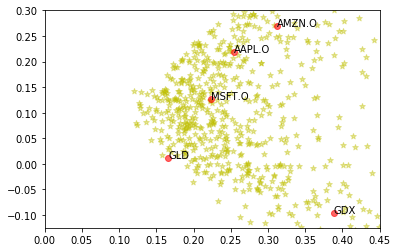

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
mu_random_short = []
sigma_random_short = []
fig, ax = plt.subplots() 
for _ in range(1000):
    w = np.random.normal(size=(num_assets, 1))
    w /= np.sum(w)
    mu_temp = np.sum(mu_original*w.reshape((-1,)))
    sigma_temp = (w.T@sigma_original@w).iloc[0,0]
    ax.scatter(np.sqrt(sigma_temp), mu_temp, alpha=0.4, marker='*', c='y') 
    mu_random_short.append(mu_temp)
    sigma_random_short.append(sigma_temp)
mu_random_short = np.array(mu_random_short)
sigma_random_short = np.array(sigma_random_short)
for ticker in tickers:
    ax.scatter(np.sqrt(sigma.loc[ticker, ticker]), mu[ticker], alpha=0.6, c='r')
    ax.annotate(ticker, (np.sqrt(sigma.loc[ticker, ticker]), mu[ticker]))
ax.set_xlim([0.,0.45])
ax.set_ylim([-0.125,0.3])
plt.show()

# equal portfolio

$$
Cov\left(r_i,\sum_jw_jr_j\right)=\sum_jCov(r_i,r_j)w_j=\sum_j\Sigma_{ij}w_j
$$

In [9]:
tickers += ['EQUAL'] 
w = (1/num_assets) * np.ones((num_assets, 1))
print(w)
mu['EQUAL'] = np.sum(mu_original*w.reshape((-1,)))
for ticker in tickers_original:
    sigma.loc['EQUAL',ticker] = np.sum(sigma_original.loc[ticker,:]*w.reshape((-1,))) 
    sigma.loc[ticker,'EQUAL'] = sigma.loc['EQUAL',ticker]
sigma.loc['EQUAL','EQUAL'] = (w.T@sigma_original@w).iloc[0,0]

[[0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]]


In [10]:
print(mu)

AAPL.O    0.218633
MSFT.O    0.126401
AMZN.O    0.269869
GDX      -0.096212
GLD       0.012069
EQUAL     0.106152
dtype: float64


In [11]:
print(sigma)

          AAPL.O    MSFT.O    AMZN.O       GDX       GLD     EQUAL
AAPL.O  0.064899  0.022504  0.026932  0.014669  0.001510  0.026103
MSFT.O  0.022504  0.050234  0.029146  0.010995 -0.000426  0.022491
AMZN.O  0.026932  0.029146  0.097792  0.009917 -0.001584  0.032440
GDX     0.014669  0.010995  0.009917  0.150716  0.048760  0.047012
GLD     0.001510 -0.000426 -0.001584  0.048760  0.027666  0.015185
EQUAL   0.026103  0.022491  0.032440  0.047012  0.015185  0.028646


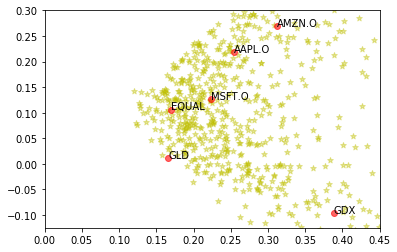

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(np.sqrt(sigma_random_short), mu_random_short, alpha=0.4, marker='*', c='y') 
for ticker in tickers:
    ax.scatter(np.sqrt(sigma.loc[ticker, ticker]), mu[ticker], alpha=0.6, c='r')
    ax.annotate(ticker, (np.sqrt(sigma.loc[ticker, ticker]), mu[ticker]))
ax.set_xlim([0.,0.45])
ax.set_ylim([-0.125,0.3])
plt.show()

# gmvp

$$
w_{GMVP}
=
\frac{\Sigma^{-1}
\left[\begin{array}{l}
1\\
1\\
\vdots\\
1\\
1
\end{array}\right]}{\mbox{np.sum}\left(\Sigma^{-1}
\left[\begin{array}{l}
1\\
1\\
\vdots\\
1\\
1
\end{array}\right]\right)}
$$

### Quadratic program

$$\begin{array}{llll}
\mbox{argmin}_{\bf w}&&{\bf w}^T\Sigma{\bf w}\\
\\
\mbox{subject to}&&{\bf 1}^T{\bf w}=1\\
\end{array}$$

### Lagrangian

$$
{\cal L}({\bf w},\lambda)={\bf w}^T\Sigma{\bf w}-\lambda({\bf 1}^T{\bf w}-1)
$$

### Solution

$$\begin{array}{llllll}
\displaystyle \frac{\partial{\cal L}}{\partial{\bf w}}&=&2\Sigma{\bf w}-\lambda{\bf 1}={\bf 0}&\Rightarrow&{\bf w}\propto \Sigma^{-1}{\bf 1}
\ \ \Rightarrow\ \ \displaystyle
{\bf w}
=\frac{\Sigma^{-1}{\bf 1}}
{\sum_{i=1}^n\left(\Sigma^{-1}{\bf 1}\right)_i}\nonumber\\
\\
\displaystyle \frac{\partial{\cal L}}{\partial\lambda}&=&-({\bf 1}^T{\bf w}-1)=0\nonumber
\end{array}$$

In [13]:
tickers += ['GMVP'] 
w = np.linalg.inv(sigma_original) @ np.ones((num_assets, 1))
w /= np.sum(w)
print(w)
mu['GMVP'] = np.sum(mu_original*w.reshape((-1,)))
for ticker in tickers_original:
    sigma.loc['GMVP',ticker] = np.sum(sigma_original.loc[ticker,:]*w.reshape((-1,))) 
    sigma.loc[ticker,'GMVP'] = sigma.loc['GMVP',ticker]
sigma.loc['GMVP','GMVP'] = (w.T@sigma_original@w).iloc[0,0]

[[ 0.11944775]
 [ 0.20623192]
 [ 0.06616518]
 [-0.21663107]
 [ 0.82478621]]


In [14]:
print(mu)

AAPL.O    0.218633
MSFT.O    0.126401
AMZN.O    0.269869
GDX      -0.096212
GLD       0.012069
EQUAL     0.106152
GMVP      0.100836
dtype: float64


In [15]:
print(sigma)

          AAPL.O    MSFT.O    AMZN.O       GDX       GLD     EQUAL      GMVP
AAPL.O  0.064899  0.022504  0.026932  0.014669  0.001510  0.026103  0.012243
MSFT.O  0.022504  0.050234  0.029146  0.010995 -0.000426  0.022491  0.012243
AMZN.O  0.026932  0.029146  0.097792  0.009917 -0.001584  0.032440  0.012243
GDX     0.014669  0.010995  0.009917  0.150716  0.048760  0.047012  0.012243
GLD     0.001510 -0.000426 -0.001584  0.048760  0.027666  0.015185  0.012243
EQUAL   0.026103  0.022491  0.032440  0.047012  0.015185  0.028646       NaN
GMVP    0.012243  0.012243  0.012243  0.012243  0.012243       NaN  0.012243


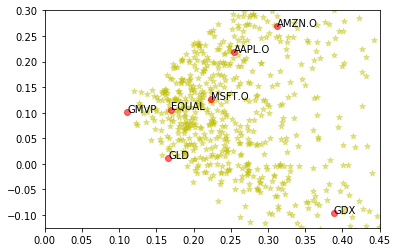

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(np.sqrt(sigma_random_short), mu_random_short, alpha=0.4, marker='*', c='y') 
for ticker in tickers:
    ax.scatter(np.sqrt(sigma.loc[ticker, ticker]), mu[ticker], alpha=0.6, c='r')
    ax.annotate(ticker, (np.sqrt(sigma.loc[ticker, ticker]), mu[ticker]))
ax.set_xlim([0.,0.45])
ax.set_ylim([-0.125,0.3])
plt.show()

In [17]:
from copy import copy
w_gmvp = copy(w)

# market portfolio

$$
w_{sharpe}(r)
=
\frac{\Sigma^{-1}
\left(\left[\begin{array}{c}
\mu[0]\\
\mu[1]\\
\vdots\\
\mu[n-2]\\
\mu[n-1]
\end{array}\right]-r\right)}{\mbox{np.sum}\left(\left[\begin{array}{c}
\mu[0]\\
\mu[1]\\
\vdots\\
\mu[n-2]\\
\mu[n-1]
\end{array}\right]-r\right)}
$$

### First try

$$
\begin{array}{llll}
\mbox{argmax}_{\bf w}\ \mbox{or}\ \mbox{argmin}_{\bf w}&&&\displaystyle\frac{\mu^T{\bf w}-r}{\sqrt{{\bf w}^T\Sigma{\bf w}}}
=\frac{(\mu-r)^T{\bf w}}{\sqrt{{\bf w}^T\Sigma{\bf w}}}:=\frac{\tilde{\mu}^T{\bf w}}{\sqrt{{\bf w}^T\Sigma{\bf w}}}\quad\leftarrow\mbox{Sharpe ratio}\\
\\
\mbox{subject to}&&&{\bf 1}^T{\bf w}=1\\
\end{array}
$$

### Second try

Since ${\bf w}$ and $2{\bf w}$ report same objective values,
$$
\mbox{argmax}_{\bf w}\ \mbox{or}\ \mbox{argmin}_{\bf w}\ \ \displaystyle\frac{\tilde{\mu}^T{\bf w}}{\sqrt{{\bf w}^T\Sigma{\bf w}}}
$$

### Third try

$$
\begin{array}{llll}
\mbox{argmax}_{\bf w}\ \mbox{or}\ \mbox{argmin}_{\bf w}&&&\tilde{\mu}^T{\bf w}\\
\\
\mbox{subject to}&&&{\bf w}^T\Sigma{\bf w}=1\\
\end{array}
$$

### Lagrangian

$$
{\cal L}({\bf w},\lambda)
=
\tilde{\mu}^T{\bf w}+\lambda\left({\bf w}^T\Sigma{\bf w}-1\right)
$$

### Solution

$$\begin{array}{llllll}
\displaystyle \frac{\partial{\cal L}}{\partial{\bf w}}&=&\tilde{\mu}+2\lambda\Sigma{\bf w}={\bf 0}&\Rightarrow&2\lambda\Sigma{\bf w}=-\tilde\mu\nonumber\\
\\
\displaystyle \frac{\partial{\cal L}}{\partial\lambda}&=&{\bf w}^T\Sigma{\bf w}-1=0&\Rightarrow&{\bf w}^T\Sigma{\bf w}=1\nonumber
\end{array}$$
$$$$
$$
{\bf w}\propto \Sigma^{-1}\tilde{\mu}=\Sigma^{-1}({\mu}-r)
\ \ \Rightarrow\ \ 
{\bf w}
=\frac{\Sigma^{-1}({\mu}-r)}
{\sum_{i=1}^n\left(\Sigma^{-1}({\mu}-r)\right)_i}
$$

In [18]:
tickers += ['MARKET'] 
r = 0.03
w = np.linalg.inv(sigma_original) @ (mu_original.values.reshape((-1,1)) - r)
w /= np.sum(w)
print(w)
mu['MARKET'] = np.sum(mu_original*w.reshape((-1,)))
for ticker in tickers_original:
    sigma.loc['MARKET',ticker] = np.sum(sigma_original.loc[ticker,:]*w.reshape((-1,))) 
    sigma.loc[ticker,'MARKET'] = sigma.loc['MARKET',ticker]
sigma.loc['MARKET','MARKET'] = (w.T@sigma_original@w).iloc[0,0]

[[ 0.42394944]
 [ 0.03368149]
 [ 0.34797528]
 [-0.40539692]
 [ 0.59979071]]


In [19]:
print(mu)

AAPL.O    0.218633
MSFT.O    0.126401
AMZN.O    0.269869
GDX      -0.096212
GLD       0.012069
EQUAL     0.106152
GMVP      0.100836
MARKET    0.237098
dtype: float64


In [20]:
print(sigma)

          AAPL.O    MSFT.O    AMZN.O       GDX       GLD     EQUAL      GMVP  \
AAPL.O  0.064899  0.022504  0.026932  0.014669  0.001510  0.026103  0.012243   
MSFT.O  0.022504  0.050234  0.029146  0.010995 -0.000426  0.022491  0.012243   
AMZN.O  0.026932  0.029146  0.097792  0.009917 -0.001584  0.032440  0.012243   
GDX     0.014669  0.010995  0.009917  0.150716  0.048760  0.047012  0.012243   
GLD     0.001510 -0.000426 -0.001584  0.048760  0.027666  0.015185  0.012243   
EQUAL   0.026103  0.022491  0.032440  0.047012  0.015185  0.028646       NaN   
GMVP    0.012243  0.012243  0.012243  0.012243  0.012243       NaN  0.012243   
MARKET  0.032603  0.016661  0.041458 -0.021814 -0.003099       NaN       NaN   

          MARKET  
AAPL.O  0.032603  
MSFT.O  0.016661  
AMZN.O  0.041458  
GDX    -0.021814  
GLD    -0.003099  
EQUAL        NaN  
GMVP         NaN  
MARKET  0.035794  


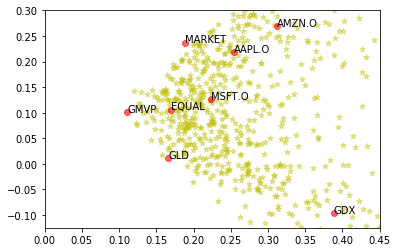

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(np.sqrt(sigma_random_short), mu_random_short, alpha=0.4, marker='*', c='y') 
for ticker in tickers:
    ax.scatter(np.sqrt(sigma.loc[ticker, ticker]), mu[ticker], alpha=0.6, c='r')
    ax.annotate(ticker, (np.sqrt(sigma.loc[ticker, ticker]), mu[ticker]))
ax.set_xlim([0.,0.45])
ax.set_ylim([-0.125,0.3])
plt.show()

In [22]:
from copy import copy
w_market = copy(w)

# efficient frontier

### Two funds theorem  (Merton)
For two funds $w_{1}$ and $w_{2}$ on envelope
$$
w = t*w_{1} + (1-t)*w_{2}
$$
is also an envelope portfolio. 

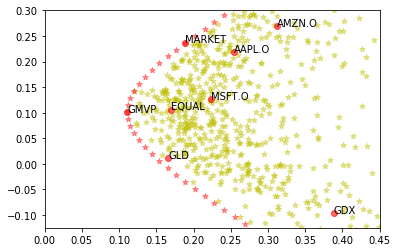

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(np.sqrt(sigma_random_short), mu_random_short, alpha=0.4, marker='*', c='y') 
for ticker in tickers:
    ax.scatter(np.sqrt(sigma.loc[ticker, ticker]), mu[ticker], alpha=0.6, c='r')
    ax.annotate(ticker, (np.sqrt(sigma.loc[ticker, ticker]), mu[ticker]))
for t in np.arange(-1.,3.,0.1):
    w = t*w_gmvp + (1-t)*w_market
    w /= np.sum(w)
    mu_temp = np.sum(mu_original*w.reshape((-1,)))
    sigma_temp = (w.T@sigma_original@w).iloc[0,0]
    ax.scatter(np.sqrt(sigma_temp), mu_temp, alpha=0.4, marker='*', c='r') 
ax.set_xlim([0.,0.45])
ax.set_ylim([-0.125,0.3])
plt.show()    

# capital market line

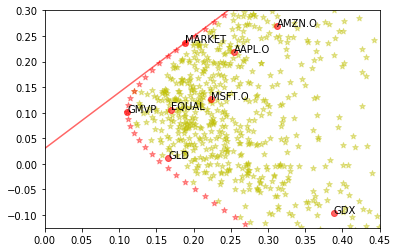

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(np.sqrt(sigma_random_short), mu_random_short, alpha=0.4, marker='*', c='y') 
for ticker in tickers:
    ax.scatter(np.sqrt(sigma.loc[ticker, ticker]), mu[ticker], alpha=0.6, c='r')
    ax.annotate(ticker, (np.sqrt(sigma.loc[ticker, ticker]), mu[ticker]))
for t in np.arange(-1.,3.,0.1):
    w = t*w_gmvp + (1-t)*w_market
    w /= np.sum(w)
    mu_temp = np.sum(mu_original*w.reshape((-1,)))
    sigma_temp = (w.T@sigma_original@w).iloc[0,0]
    ax.scatter(np.sqrt(sigma_temp), mu_temp, alpha=0.4, marker='*', c='r') 
dx = np.sqrt(sigma.loc['MARKET','MARKET']) 
dy = mu.loc['MARKET'] - r
ax.plot([0,dx,2*dx], [r,r+dy,r+2*dy], 'r', alpha=0.6)
ax.set_xlim([0.,0.45])
ax.set_ylim([-0.125,0.3])
plt.show()    